In [2]:
pip install pandas_profiling


  Obtaining dependency information for pandas_profiling from https://files.pythonhosted.org/packages/57/b7/e13216265ae3135ecda13e966aad9ce04b7e7b3e2d87d056b032fc9f457c/pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for joblib~=1.1.0 from https://files.pythonhosted.org/packages/7c/91/d3ba0401e62d7e42816bc7d97b82d19c95c164b3e149a87c0a1c026a735e/joblib-1.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for visions[type_image_path]==0.7.4 from https://files.pythonhosted.org/packages/66/00/166b2beb8046f06b77a2bf2c1dafeb52eff608f7dd420c767d5f3ce36ef5/visions-0.7.4-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for missingno>=0.4.2 from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
  Obtaining dependency information 

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
##import pandas_profiling
import seaborn as sn

In [3]:
%cd

C:\Users\Admin


In [4]:
%cd C:\Users\Admin\capstone projects\credit card Regression

C:\Users\Admin\capstone projects\credit card Regression


In [5]:
df_cc = pd.read_csv('CREDIT CARD USERS DATA.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6852\3333836706.py:1: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cc = pd.read_csv('CREDIT CARD USERS DATA.csv')


In [6]:
df_cc.shape

(5000, 132)

In [7]:
dfcc_dict = dict(df_cc.dtypes)
dfcc_dict

{'custid': dtype('O'),
 'region': dtype('float64'),
 'townsize': dtype('O'),
 'gender': dtype('float64'),
 'age': dtype('float64'),
 'agecat': dtype('float64'),
 'birthmonth': dtype('O'),
 'ed': dtype('float64'),
 'edcat': dtype('float64'),
 'jobcat': dtype('float64'),
 'union': dtype('float64'),
 'employ': dtype('float64'),
 'empcat': dtype('float64'),
 'retire': dtype('float64'),
 'income': dtype('float64'),
 'lninc': dtype('float64'),
 'inccat': dtype('float64'),
 'debtinc': dtype('float64'),
 'creddebt': dtype('float64'),
 'lncreddebt': dtype('O'),
 'othdebt': dtype('float64'),
 'lnothdebt': dtype('O'),
 'default': dtype('float64'),
 'jobsat': dtype('float64'),
 'marital': dtype('float64'),
 'spoused': dtype('float64'),
 'spousedcat': dtype('float64'),
 'reside': dtype('float64'),
 'pets': dtype('float64'),
 'pets_cats': dtype('float64'),
 'pets_dogs': dtype('float64'),
 'pets_birds': dtype('float64'),
 'pets_reptiles': dtype('float64'),
 'pets_small': dtype('float64'),
 'pets_salt

# Data cleaning : String to float conversion

In [9]:
for new_var in list(df_cc.columns):
    if new_var[:2]== 'ln':
        df_cc[new_var] = df_cc[new_var].replace('#NULL!',0)
        df_cc[new_var] = pd.to_numeric(df_cc[new_var]).astype('float64')

In [11]:
df_cc['commutetime']=df_cc['commutetime'].replace('#NULL!','NA')
df_cc['commutetime']=df_cc['commutetime'].replace('NA',np.NaN)
df_cc['commutetime']=pd.to_numeric(df_cc['commutetime'].astype(float))
df_cc['commutetime'].dtypes

dtype('float64')

In [12]:
df_cc['cardten']=df_cc['cardten'].replace('#NULL!','NA')
df_cc['cardten']=df_cc['cardten'].replace('NA',np.NaN)
df_cc['cardten']=pd.to_numeric(df_cc['cardten'].astype(float))
df_cc['cardten'].dtypes

dtype('float64')

In [13]:
df_cc['longten']=df_cc['longten'].replace('#NULL!','NA')
df_cc['longten']=df_cc['longten'].replace('NA',np.NaN)
df_cc['longten']=pd.to_numeric(df_cc['longten'].astype(float))
df_cc['longten'].dtypes

dtype('float64')

# Data cleaning : Float to String conversion

In [15]:
df_cc['townsize']=df_cc['townsize'].replace('#NULL!','NA')
df_cc['townsize']=df_cc['townsize'].replace('NA',np.NaN)
df_cc['townsize']=pd.to_numeric(df_cc['townsize'].astype(float))
df_cc['townsize'].dtypes

dtype('float64')

# Missing value treatment on Numerical variables

In [16]:
def missings_value(y):
    y=y.fillna(y.mean())
    return y
df_cc_num=df_cc._get_numeric_data().apply(lambda y : missings_value(y))

In [17]:
df_cc = df_cc[df_cc.duplicated() == False]

# Basic statistics on numerical variables

In [18]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df_cc._get_numeric_data().apply(lambda x: var_summary(x)).T
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.0,3.001400,3.0,1.421760,2.021402,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
townsize,4998.0,2.0,13431.0,2.687275,3.0,1.425925,2.033262,1.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,5.0
gender,5000.0,0.0,2518.0,0.503600,1.0,0.500037,0.250037,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
age,5000.0,0.0,235128.0,47.025600,47.0,17.770338,315.784902,18.0,18.0,20.0,23.0,31.0,47.0,62.0,72.0,76.0,79.0,79.0
agecat,5000.0,0.0,21194.0,4.238800,4.0,1.308785,1.712917,2.0,2.0,2.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0,6.0


# Outlier treatment on numerical variables except Y('cardspent','card2spent')

In [19]:
df_cc_outlier = df_cc_num[df_cc_num.columns.difference(['cardspent','card2spent'])]

In [22]:
def handling_outliers(y):
    y=y.clip(upper = y.quantile(0.99))
    y=y.clip(lower = y.quantile(0.01))
    return y

df_cc_outlier = df_cc_outlier.apply(lambda y:handling_outliers(y))

# Y Variable

In [23]:
df_cc_num['Total_spent']=df_cc_num['cardspent']+df_cc_num['card2spent']

In [24]:
df_cc_num.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03', 'Total_spent'],
      dtype='object', length=131)

# checking on outliers post treatment

In [25]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df_cc_outlier._get_numeric_data().apply(lambda x: var_summary(x)).T
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
active,5000.0,0.0,2330.0,0.4660,0.0,0.498893,0.248894,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
address,5000.0,0.0,81832.0,16.3664,14.0,12.297870,151.237599,0.0,0.0,1.0,2.0,6.0,14.0,25.0,34.0,40.0,48.0,48.0
addresscat,5000.0,0.0,16360.0,3.2720,3.0,1.319987,1.742364,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
age,5000.0,0.0,235128.0,47.0256,47.0,17.770338,315.784902,18.0,18.0,20.0,23.0,31.0,47.0,62.0,72.0,76.0,79.0,79.0
agecat,5000.0,0.0,21194.0,4.2388,4.0,1.308785,1.712917,2.0,2.0,2.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0,6.0


# Identification of categorical variables

In [26]:
df_cc.select_dtypes('object').columns

Index(['custid', 'birthmonth'], dtype='object')

# to create dummies of categorical variables and then remove the original variable and dummy count -1

In [27]:
def handling_dummies(df,col_name):
    col_dummies = pd.get_dummies(df[col_name],prefix=col_name)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(col_name,axis=1,inplace=True)
    return df

df_cc_var = df_cc[['townsize', 'birthmonth']]
for new_feature in df_cc_var.columns:
    df_cc_var[new_feature] = df_cc_var[new_feature].astype('category')
    df_cc_var = handling_dummies(df_cc_var,new_feature)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6852\3122125030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc_var[new_feature] = df_cc_var[new_feature].astype('category')


# getting the X columns

In [28]:
df_cc_X =  pd.concat([df_cc_outlier,df_cc_var,df_cc[['cardspent','card2spent']]],axis=1,sort=False)

In [29]:
df_cc_X.columns

Index(['active', 'address', 'addresscat', 'age', 'agecat', 'bfast', 'callcard',
       'callid', 'callwait', 'carbought',
       ...
       'birthmonth_January', 'birthmonth_July', 'birthmonth_June',
       'birthmonth_March', 'birthmonth_May', 'birthmonth_November',
       'birthmonth_October', 'birthmonth_September', 'cardspent',
       'card2spent'],
      dtype='object', length=145)

# getting the Y column

In [30]:
df_cc_Y=pd.DataFrame(df_cc_num['Total_spent'],columns = ['Total_spent'])

# getting the overall DataFrame

In [31]:
df_cc_total = pd.concat([df_cc_X,df_cc_Y],axis=1,sort=False)

In [32]:
pandas_profiling.ProfileReport(df_cc_X)

NameError: name 'pandas_profiling' is not defined

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf.fit( df_cc_X, df_cc_Y )

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(oob_score=True)

In [35]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

<Axes: xlabel='importance', ylabel='feature'>

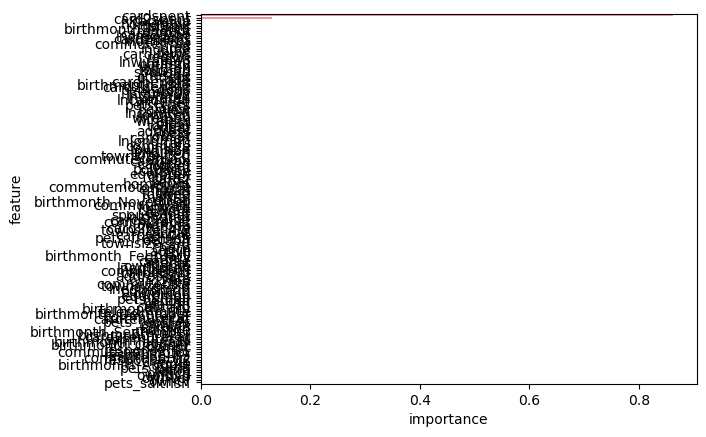

In [36]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(df_cc_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         df_cc_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [37]:
feature_rank.head()

,rank,feature,importance
0,1,cardspent,0.862659
1,2,card2spent,0.129849
2,3,carvalue,0.000644
3,4,hometype,0.000521
4,5,debtinc,0.000291


In [38]:
feature_rank.to_csv('feature_rank.csv')

# Checking the normality of Y i.e. Total_spent  and lntotalspent

In [39]:
df_cc_total['lntotal_spent']= np.log(df_cc_total['Total_spent'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6852\2775173960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df_cc_total.lntotal_spent)


<Axes: xlabel='lntotal_spent', ylabel='Density'>

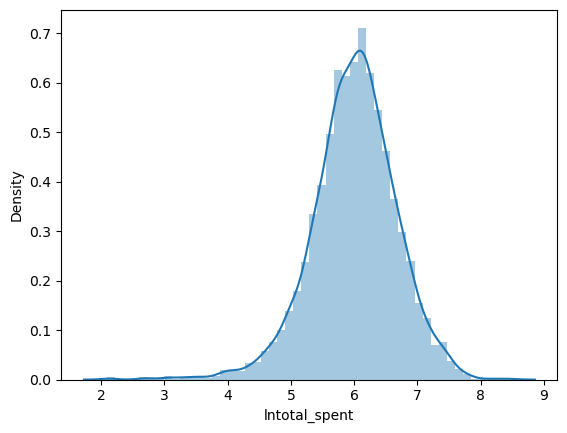

In [40]:
sn.distplot(df_cc_total.lntotal_spent)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6852\2575250160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df_cc_total.Total_spent)


<Axes: xlabel='Total_spent', ylabel='Density'>

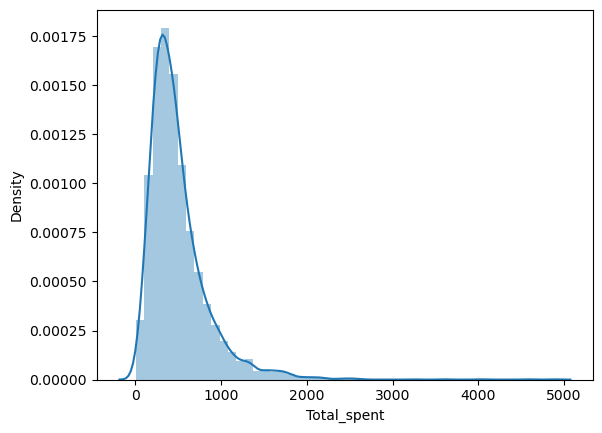

In [41]:
sn.distplot(df_cc_total.Total_spent)

In [42]:
df_cc_total=df_cc_total.drop(['Total_spent'],axis=1)

In [43]:
df_cc_total.shape

(5000, 146)

# Correlation between X variables & Y

In [44]:
df_cc_total.corr()

,active,address,addresscat,age,agecat,bfast,callcard,callid,callwait,carbought,...,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,cardspent,card2spent,lntotal_spent
active,1.000000,-0.201846,-0.213171,-0.239011,-0.237864,-0.213911,-0.084257,-0.005793,0.007167,-0.000612,...,-0.003580,0.013413,0.003112,0.009565,-0.025054,0.014525,-0.010324,-0.017515,0.005525,-0.004236
address,-0.201846,1.000000,0.927169,0.824189,0.801558,0.107197,0.306284,-0.009366,0.001415,0.008362,...,0.009907,0.022816,0.006865,-0.017785,-0.003253,-0.022481,-0.019273,0.067987,0.051718,0.042746
addresscat,-0.213171,0.927169,1.000000,0.827064,0.829099,0.122459,0.292068,-0.004938,0.014426,0.009066,...,0.004769,0.026090,0.008147,-0.022043,-0.000854,-0.033425,-0.016062,0.093819,0.070517,0.069536
age,-0.239011,0.824189,0.827064,1.000000,0.969879,0.109656,0.286721,-0.018343,0.001570,0.008255,...,0.020012,0.010682,0.013504,-0.017742,0.008049,-0.029846,-0.012905,0.031032,0.022126,0.002318
agecat,-0.237864,0.801558,0.829099,0.969879,1.000000,0.117193,0.276903,-0.009300,0.008283,0.009065,...,0.020750,0.006999,0.013645,-0.021179,0.007737,-0.028357,-0.011852,0.049701,0.037420,0.025910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
birthmonth_October,0.014525,-0.022481,-0.033425,-0.029846,-0.028357,0.014039,-0.022058,-0.008513,-0.028294,-0.016289,...,-0.089680,-0.090506,-0.090035,-0.094106,-0.088013,1.000000,-0.094906,0.005178,0.007279,-0.000486
birthmonth_September,-0.010324,-0.019273,-0.016062,-0.012905,-0.011852,-0.004881,-0.015409,0.019935,0.010573,-0.041229,...,-0.095284,-0.096161,-0.095661,-0.099986,-0.093512,-0.094906,1.000000,-0.010472,-0.008782,-0.007053
cardspent,-0.017515,0.067987,0.093819,0.031032,0.049701,0.027620,0.027903,0.054094,0.054906,0.007784,...,-0.001385,-0.006037,0.015704,-0.000122,0.008087,0.005178,-0.010472,1.000000,0.586610,0.812192
card2spent,0.005525,0.051718,0.070517,0.022126,0.037420,0.020227,0.029411,0.035858,0.046335,-0.005965,...,-0.000671,0.004165,-0.010713,-0.000531,0.009989,0.007279,-0.008782,0.586610,1.000000,0.723700


In [45]:
df_cc_corr = df_cc_total.corr().iloc[-1:,:]

In [46]:
df_cc_corr.to_csv('df_Cc_corr.csv')

# Creating feature columns basis correlation output (abs correlation value >10% or/and feature rank)
#Taking no. of variables basis sqrt(N)
#Here taking 18 variables basis 143 total variables

In [47]:
df_cc_feature = df_cc_total[['cardspent','card2spent','debtinc','card2type','wiremon',
                        'carvalue','lninc','birthmonth_June','ed','spoused','lntollten',
                        'internet','income','creddebt','hometype','inccat','age','card2items','lntotal_spent']]

In [48]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(df_cc_feature,test_size=0.3,random_state = 123)

In [49]:
train.head()

,cardspent,card2spent,debtinc,card2type,wiremon,carvalue,lninc,birthmonth_June,ed,spoused,lntollten,internet,income,creddebt,hometype,inccat,age,card2items,lntotal_spent
4036,458.10,210.04,20.0,1.0,0.0,22.0,3.56,0,17.0,12.0,0.00,1.0,35.0,2.19,1.0,2.0,77.0,6.0,6.504498
2883,181.83,0.00,8.7,4.0,0.0,22.4,3.87,0,16.0,14.0,0.00,0.0,48.0,2.03,4.0,2.0,76.0,0.0,5.203072
4162,200.50,19.04,2.8,2.0,47.8,23.1,3.85,0,17.0,-1.0,6.50,2.0,47.0,0.24,1.0,2.0,43.0,1.0,5.391534
4640,414.03,85.98,17.7,3.0,0.0,23.5,3.81,0,10.0,-1.0,6.38,0.0,45.0,1.06,1.0,2.0,31.0,3.0,6.214628
2430,1799.19,416.84,14.4,1.0,0.0,18.6,3.61,0,21.0,-1.0,6.65,2.0,37.0,3.64,3.0,2.0,35.0,7.0,7.703473


In [50]:
train.columns

Index(['cardspent', 'card2spent', 'debtinc', 'card2type', 'wiremon',
       'carvalue', 'lninc', 'birthmonth_June', 'ed', 'spoused', 'lntollten',
       'internet', 'income', 'creddebt', 'hometype', 'inccat', 'age',
       'card2items', 'lntotal_spent'],
      dtype='object')

In [51]:
train.columns= [phrase.strip().replace('.', '_') for phrase in train.columns]
train.columns

Index(['cardspent', 'card2spent', 'debtinc', 'card2type', 'wiremon',
       'carvalue', 'lninc', 'birthmonth_June', 'ed', 'spoused', 'lntollten',
       'internet', 'income', 'creddebt', 'hometype', 'inccat', 'age',
       'card2items', 'lntotal_spent'],
      dtype='object')

In [52]:
all_columns = "+".join(train.columns.difference( ['lntotal_spent'] ))

print (all_columns)

my_formula = "lntotal_spent~" + all_columns

print (my_formula)

age+birthmonth_June+card2items+card2spent+card2type+cardspent+carvalue+creddebt+debtinc+ed+hometype+inccat+income+internet+lninc+lntollten+spoused+wiremon
lntotal_spent~age+birthmonth_June+card2items+card2spent+card2type+cardspent+carvalue+creddebt+debtinc+ed+hometype+inccat+income+internet+lninc+lntollten+spoused+wiremon


In [53]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula, data=train).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lntotal_spent   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     840.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:08:12   Log-Likelihood:                -703.75
No. Observations:                3500   AIC:                             1446.
Df Residuals:                    3481   BIC:                             1563.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2582      0.071     59.691      0.000       4.118       4.398
age                -0.0010      0.000     -3.221      0.001      -0.002      -0.000
birthmonth_June    -0.0040      0.018     -0.222      0.825      -0.039       0.031
card2items          0.0910      0.003     31.677      0.000       0.085       0.097
card2spent          0.0004   6.12e-05      5.904      0.000       0.000       0.000
card2type          -0.0012      0.004     -0.277      0.781      -0.010       0.008
cardspent           0.0018   2.73e-05     65.924      0.000       0.002       0.002
carvalue           -0.0008      0.000     -1.776      0.076      -0.002    8.42e-05
creddebt           -0.0010      0.003     -0.289      0.773      -0.008       0.006
debtinc          3.669e-06      0.001      0.004      0.997      -0.002       0.002
ed                 -0.0039      0.002     -2.162      0.031      -0.008      -0.000
hometype           -0.0020      0.006     -0.364      0.716      -0.013       0.009
inccat             -0.0345      0.014     -2.391      0.017      -0.063      -0.006
income             -0.0011      0.000     -3.671      0.000      -0.002      -0.001
internet            0.0073      0.004      1.739      0.082      -0.001       0.016
lninc               0.2445      0.024      9.990      0.000       0.196       0.292
lntollten          -0.0011      0.002     -0.674      0.500      -0.004       0.002
spoused             0.0001      0.001      0.159      0.874      -0.001       0.001
wiremon             0.0008      0.000      2.460      0.014       0.000       0.001
==============================================================================
Omnibus:                     2796.218   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116173.675
Skew:                          -3.471   Prob(JB):                         0.00
Kurtosis:                      30.357   Cond. No.                     6.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculation of VIF

In [55]:
import statsmodels as smd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [56]:
%%capture
#gather features
#features = "+".join(df_cc_feature.columns - ["lntotal_spent"])

# get y and X dataframes based on this regression
y, X = dmatrices('lntotal_spent~age+birthmonth_June+card2items+card2spent+card2type+cardspent+carvalue+creddebt+debtinc+ed+hometype+inccat+income+internet+lninc+lntollten+spoused+wiremon',df_cc_feature, return_type='dataframe')


In [57]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [58]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [59]:
 vif.round(1)

,VIF Factor,features
0,199.5,Intercept
1,1.1,age
2,1.0,birthmonth_June
3,2.0,card2items
4,3.0,card2spent
5,1.0,card2type
6,1.8,cardspent
7,3.6,carvalue
8,2.5,creddebt
9,1.5,debtinc


# The following variables have VIF greated than 10 and therefore need to be removed
Intercept
inccat
lninc


# Recreating the model minus the variables with High VIF
Intercept is being removed using "-1" in my_formula

In [60]:
all_columns = "+".join(train.columns.difference( ['lntotal_spent','inccat','lninc'] ))

print (all_columns)

my_formula = "lntotal_spent~" + all_columns + "-1"

print (my_formula)

age+birthmonth_June+card2items+card2spent+card2type+cardspent+carvalue+creddebt+debtinc+ed+hometype+income+internet+lntollten+spoused+wiremon
lntotal_spent~age+birthmonth_June+card2items+card2spent+card2type+cardspent+carvalue+creddebt+debtinc+ed+hometype+income+internet+lntollten+spoused+wiremon-1


In [61]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula, data=train).fit()

In [62]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          lntotal_spent   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.377e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:10:09   Log-Likelihood:                         -3968.8
No. Observations:                3500   AIC:                                      7970.
Df Residuals:                    3484   BIC:                                      8068.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0139      0.001     20.234      0.000       0.013       0.015
birthmonth_June     0.0909      0.046      1.983      0.047       0.001       0.181
card2items          0.2042      0.007     29.197      0.000       0.191       0.218
card2spent         -0.0009      0.000     -5.706      0.000      -0.001      -0.001
card2type           0.1988      0.011     18.390      0.000       0.178       0.220
cardspent           0.0024   6.83e-05     35.102      0.000       0.002       0.003
carvalue            0.0010      0.001      0.858      0.391      -0.001       0.003
creddebt           -0.0702      0.008     -8.346      0.000      -0.087      -0.054
debtinc             0.0337      0.002     13.742      0.000       0.029       0.038
ed                  0.1617      0.003     46.596      0.000       0.155       0.168
hometype            0.2049      0.014     15.130      0.000       0.178       0.231
income              0.0022      0.001      3.657      0.000       0.001       0.003
internet           -0.0401      0.011     -3.758      0.000      -0.061      -0.019
lntollten           0.0396      0.004      9.400      0.000       0.031       0.048
spoused             0.0031      0.002      1.875      0.061      -0.000       0.006
wiremon            -0.0065      0.001     -7.710      0.000      -0.008      -0.005
==============================================================================
Omnibus:                      196.256   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.223
Skew:                          -0.452   Prob(JB):                     6.50e-71
Kurtosis:                       4.182   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Getting rid of variable with high p value in t-test and then rebuilding the model
#Variable with high p value is "carvalue" and the same needs to be removed

In [63]:
all_columns = "+".join(train.columns.difference( ['lntotal_spent','inccat','lninc','carvalue'] ))

print (all_columns)

my_formula = "lntotal_spent~" + all_columns + "-1"

print (my_formula)

age+birthmonth_June+card2items+card2spent+card2type+cardspent+creddebt+debtinc+ed+hometype+income+internet+lntollten+spoused+wiremon
lntotal_spent~age+birthmonth_June+card2items+card2spent+card2type+cardspent+creddebt+debtinc+ed+hometype+income+internet+lntollten+spoused+wiremon-1


In [64]:
lm=smf.ols(formula=my_formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          lntotal_spent   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.469e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:17:19   Log-Likelihood:                         -3969.2
No. Observations:                3500   AIC:                                      7968.
Df Residuals:                    3485   BIC:                                      8061.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0139      0.001     20.242      0.000       0.013       0.015
birthmonth_June     0.0914      0.046      1.994      0.046       0.002       0.181
card2items          0.2043      0.007     29.215      0.000       0.191       0.218
card2spent         -0.0009      0.000     -5.728      0.000      -0.001      -0.001
card2type           0.1989      0.011     18.408      0.000       0.178       0.220
cardspent           0.0024   6.82e-05     35.166      0.000       0.002       0.003
creddebt           -0.0704      0.008     -8.370      0.000      -0.087      -0.054
debtinc             0.0337      0.002     13.773      0.000       0.029       0.039
ed                  0.1617      0.003     46.601      0.000       0.155       0.168
hometype            0.2051      0.014     15.156      0.000       0.179       0.232
income              0.0026      0.000      6.215      0.000       0.002       0.003
internet           -0.0401      0.011     -3.757      0.000      -0.061      -0.019
lntollten           0.0395      0.004      9.386      0.000       0.031       0.048
spoused             0.0031      0.002      1.878      0.061      -0.000       0.006
wiremon            -0.0066      0.001     -7.715      0.000      -0.008      -0.005
==============================================================================
Omnibus:                      193.930   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.858
Skew:                          -0.451   Prob(JB):                     2.58e-69
Kurtosis:                       4.162   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Getting rid of variable with high p value in t-test and then rebuilding the model
#Variable with high p value is "spoused" and the same needs to be removed

In [65]:
all_columns = "+".join(train.columns.difference( ['lntotal_spent','inccat','lninc','carvalue','spoused'] ))

print (all_columns)

my_formula = "lntotal_spent~" + all_columns + "-1"

print (my_formula)

age+birthmonth_June+card2items+card2spent+card2type+cardspent+creddebt+debtinc+ed+hometype+income+internet+lntollten+wiremon
lntotal_spent~age+birthmonth_June+card2items+card2spent+card2type+cardspent+creddebt+debtinc+ed+hometype+income+internet+lntollten+wiremon-1


# FINAL MODEL

In [66]:
lm=smf.ols(formula=my_formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          lntotal_spent   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.573e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:18:39   Log-Likelihood:                         -3971.0
No. Observations:                3500   AIC:                                      7970.
Df Residuals:                    3486   BIC:                                      8056.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0139      0.001     20.261      0.000       0.013       0.015
birthmonth_June     0.0931      0.046      2.032      0.042       0.003       0.183
card2items          0.2045      0.007     29.229      0.000       0.191       0.218
card2spent         -0.0009      0.000     -5.730      0.000      -0.001      -0.001
card2type           0.1989      0.011     18.401      0.000       0.178       0.220
cardspent           0.0024   6.83e-05     35.189      0.000       0.002       0.003
creddebt           -0.0705      0.008     -8.381      0.000      -0.087      -0.054
debtinc             0.0336      0.002     13.721      0.000       0.029       0.038
ed                  0.1627      0.003     47.544      0.000       0.156       0.169
hometype            0.2060      0.014     15.226      0.000       0.180       0.233
income              0.0026      0.000      6.207      0.000       0.002       0.003
internet           -0.0406      0.011     -3.809      0.000      -0.062      -0.020
lntollten           0.0400      0.004      9.517      0.000       0.032       0.048
wiremon            -0.0065      0.001     -7.708      0.000      -0.008      -0.005
==============================================================================
Omnibus:                      191.402   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.280
Skew:                          -0.448   Prob(JB):                     4.20e-68
Kurtosis:                       4.151   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
## Building the model with train set and make predictions on test set
from sklearn import metrics

# RMSE of training data

In [68]:
train_X = train[train.columns.difference(['lntotal_spent'])]
train_y = train[['lntotal_spent']]

In [69]:
y_pred_t = lm.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error(train_y, y_pred_t) )
print(rmse_t)
print (metrics.r2_score(train_y,y_pred_t ))

0.7524825675340554
-0.21043213960933826


In [70]:
test_X = test[train.columns.difference(['lntotal_spent'])]
test_y = test[['lntotal_spent']]

In [71]:
# RMSE of testing data

In [72]:
y_pred_t = lm.predict(test_X)
rmse_t = np.sqrt( metrics.mean_squared_error(test_y, y_pred_t) )
print(rmse_t)
print (metrics.r2_score(test_y,y_pred_t ))

0.7258070218920095
-0.2852609509305748


In [67]:
#RMSE of train data is higher than that of test data but this is not very high (difference is not much )